In [248]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [249]:
# Step 1: Data Preparation
# Read data from .arff files

# Load training data
data_train, meta_train = arff.loadarff("HouseTwenty_TRAIN.arff")
df_train = pd.DataFrame(data_train)


In [250]:
df_train.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1992,att1993,att1994,att1995,att1996,att1997,att1998,att1999,att2000,target
0,349.0,349.0,347.0,351.0,347.0,347.0,347.0,347.0,351.0,348.0,...,495.0,495.0,495.0,503.0,499.0,506.0,502.0,506.0,513.0,b'1'
1,199.0,200.0,200.0,200.0,197.0,202.0,199.0,198.0,198.0,200.0,...,627.0,632.0,643.0,628.0,629.0,649.0,637.0,635.0,635.0,b'1'
2,368.0,375.0,369.0,368.0,368.0,368.0,375.0,364.0,370.0,369.0,...,374.0,374.0,375.0,374.0,372.0,375.0,372.0,377.0,378.0,b'1'
3,391.0,391.0,398.0,398.0,398.0,385.0,385.0,383.0,383.0,383.0,...,366.0,354.0,354.0,352.0,352.0,354.0,349.0,351.0,351.0,b'1'
4,118.0,118.0,118.0,119.0,119.0,122.0,118.0,118.0,120.0,119.0,...,537.0,536.0,533.0,534.0,532.0,532.0,529.0,535.0,527.0,b'1'


In [251]:
# Load test data
data_test, meta_test = arff.loadarff("HouseTwenty_TEST.arff")
df_test = pd.DataFrame(data_test)


In [6]:
df_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1992,att1993,att1994,att1995,att1996,att1997,att1998,att1999,att2000,target
0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,115.0,115.0,116.0,...,235.0,235.0,231.0,229.0,231.0,231.0,228.0,228.0,233.0,b'1'
1,357.0,357.0,357.0,357.0,356.0,356.0,358.0,358.0,358.0,358.0,...,306.0,312.0,312.0,303.0,303.0,308.0,306.0,306.0,308.0,b'1'
2,354.0,354.0,354.0,352.0,356.0,356.0,357.0,357.0,356.0,354.0,...,363.0,363.0,361.0,361.0,363.0,363.0,372.0,370.0,370.0,b'1'
3,365.0,367.0,365.0,367.0,363.0,365.0,369.0,370.0,370.0,365.0,...,528.0,530.0,528.0,528.0,528.0,545.0,539.0,545.0,539.0,b'1'
4,368.0,363.0,361.0,361.0,368.0,361.0,368.0,363.0,363.0,363.0,...,499.0,499.0,498.0,499.0,499.0,506.0,506.0,500.0,498.0,b'1'


In [252]:
df_train.shape,df_test.shape

((40, 2001), (119, 2001))

In [253]:
# Convert class labels to integers
df_train['target'] = df_train['target'].astype(int)
df_test['target'] = df_test['target'].astype(int)


In [13]:
df_train.tail()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1992,att1993,att1994,att1995,att1996,att1997,att1998,att1999,att2000,target
35,623.0,625.0,625.0,625.0,634.0,621.0,612.0,612.0,623.0,609.0,...,2207.0,2207.0,2248.0,2199.0,731.0,731.0,2206.0,2252.0,731.0,2
36,382.0,222.0,352.0,352.0,222.0,357.0,357.0,357.0,517.0,511.0,...,1103.0,1100.0,1100.0,1100.0,1104.0,1105.0,1104.0,1105.0,1113.0,2
37,120.0,120.0,120.0,117.0,118.0,118.0,118.0,117.0,118.0,117.0,...,117.0,117.0,117.0,118.0,116.0,116.0,117.0,117.0,117.0,2
38,116.0,116.0,117.0,117.0,117.0,117.0,116.0,116.0,116.0,116.0,...,360.0,359.0,359.0,356.0,356.0,1733.0,1733.0,1710.0,1710.0,2
39,124.0,124.0,124.0,124.0,124.0,145.0,131.0,131.0,130.0,132.0,...,3767.0,3874.0,3863.0,3786.0,3814.0,3917.0,3790.0,3846.0,3881.0,2


In [254]:
# Separate features and labels
X_train, y_train = df_train.drop(columns=['target']).values, df_train['target'].values
X_test, y_test = df_test.drop(columns=['target']).values, df_test['target'].values

In [15]:
X_train.shape,X_test.shape

((40, 2000), (119, 2000))

In [16]:
y_train.shape,y_test.shape

((40,), (119,))

In [255]:
# Concatenate training and test data
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [18]:
X.shape,y.shape

((159, 2000), (159,))

In [256]:
from sklearn.metrics.pairwise import cosine_similarity

In [257]:
# Step 2: Network Construction
# Compute similarity matrix
similarity_matrix = cosine_similarity(X)

In [258]:
# Convert similarity matrix to a graph
G = nx.Graph()

In [259]:
# Add nodes to the graph
num_nodes = len(X)
for i in range(num_nodes):
    G.add_node(i)

In [260]:
# Add edges to the graph based on similarity threshold
sim_threshold = 0.7  # Adjust this threshold as needed
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if similarity_matrix[i, j] >= sim_threshold:
            G.add_edge(i, j)

In [170]:
# Now, G is a NetworkX graph representing the network constructed from this data

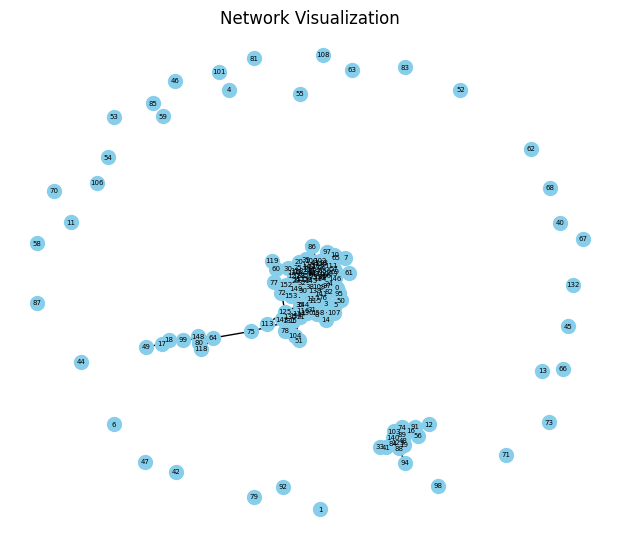

In [278]:
# Step 3: Visualization
# Draw the graph
plt.figure(figsize=(6, 5))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='black', linewidths=1, font_size=5)
# Add a title
plt.title("Network Visualization")
plt.savefig('Network')
# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

In [39]:
'Step 3: Network Analysis'

'Step 3: Network Analysis'

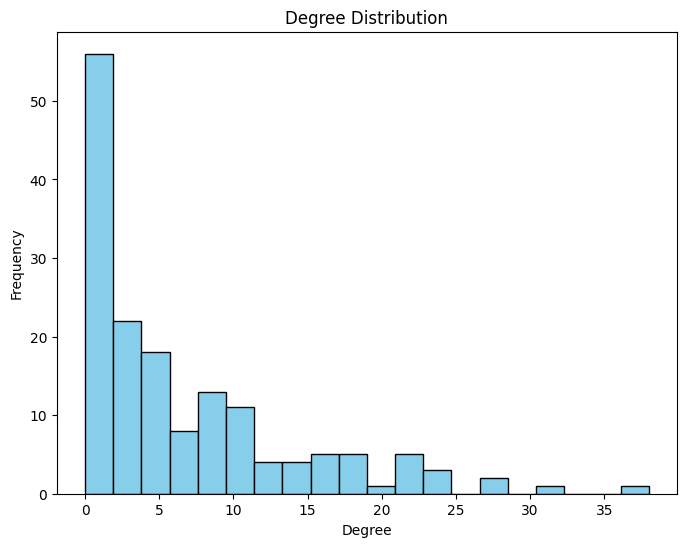

In [284]:
# 1. Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=20, color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig('DegreeDist')
plt.show()

In [263]:
# Centrality measures
centrality = nx.degree_centrality(G)
central_nodes = sorted(centrality, key=centrality.get, reverse=True)[:10]  # Top 10 central nodes
print("Top 10 central nodes:", central_nodes)

Top 10 central nodes: [136, 147, 150, 22, 27, 36, 137, 122, 129, 139]


In [264]:
# 3. Clustering Coefficient
clustering_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient:", clustering_coefficient)

Average Clustering Coefficient: 0.3859396366442053


In [265]:
# 4. Connected Components
connected_components = nx.connected_components(G)
print("Connected Components:", list(connected_components))

Connected Components: [{0, 2, 3, 5, 7, 8, 9, 10, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 43, 49, 50, 51, 57, 60, 61, 64, 65, 69, 72, 75, 76, 77, 78, 80, 82, 86, 90, 93, 95, 96, 97, 99, 100, 102, 104, 105, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158}, {1}, {4}, {6}, {11}, {33, 103, 88, 41, 74, 123, 12, 140, 16, 48, 19, 84, 56, 89, 91, 94}, {13}, {40}, {42}, {44}, {45}, {46}, {47}, {52}, {53}, {54}, {55}, {58}, {59}, {62}, {63}, {66}, {67}, {68}, {70}, {71}, {73}, {79}, {81}, {83}, {85}, {87}, {92}, {98}, {101}, {106}, {108}, {132}]


In [268]:
# 4. Number of Connected Components
num_connected_components = nx.number_connected_components(G)
print("Number of Connected Components:", num_connected_components)

Number of Connected Components: 38


In [267]:
# 5. Community Detection
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
print("Communities:", communities)

Communities: [frozenset({0, 128, 2, 3, 5, 9, 138, 139, 145, 147, 20, 149, 22, 23, 152, 153, 150, 151, 25, 155, 28, 157, 29, 30, 158, 32, 34, 36, 38, 50, 60, 61, 65, 76, 77, 90, 95, 96, 100, 107, 110, 112, 119, 120, 127}), frozenset({129, 133, 7, 8, 136, 10, 137, 141, 14, 142, 146, 24, 26, 27, 156, 37, 39, 43, 57, 69, 82, 86, 97, 102, 105, 109, 111, 114, 115, 117, 121, 122}), frozenset({74, 12, 140, 16, 19, 84, 88, 89, 91, 94, 33, 103, 41, 48, 56, 123}), frozenset({130, 131, 134, 135, 72, 78, 143, 144, 21, 154, 31, 35, 104, 113, 116, 125}), frozenset({64, 99, 75, 15, 80, 17, 18, 49, 51, 148, 118}), frozenset({124, 93, 126}), frozenset({1}), frozenset({4}), frozenset({6}), frozenset({11}), frozenset({13}), frozenset({40}), frozenset({42}), frozenset({44}), frozenset({45}), frozenset({46}), frozenset({47}), frozenset({52}), frozenset({53}), frozenset({54}), frozenset({55}), frozenset({58}), frozenset({59}), frozenset({62}), frozenset({63}), frozenset({66}), frozenset({67}), frozenset({68}

In [50]:
'Step 4: Clustering the Data'

'Step 4: Clustering the Data'

In [269]:
# K-means clustering
k = len(np.unique(y))  # Number of clusters = number of classes
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)


C:\Users\Narayan Biswas\anaconda3\envs\tensoeflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


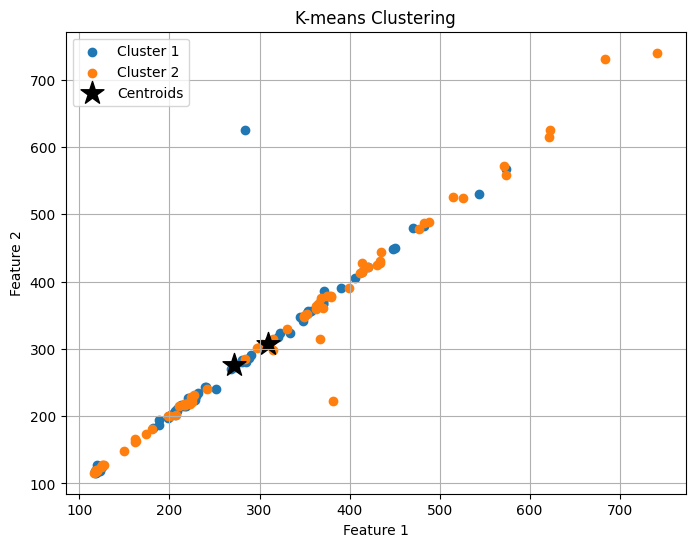

In [270]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='black', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
'Step 5: Evaluation'

'Step 5: Evaluation'

In [271]:
# Compute adjusted Rand index
ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.12304186416797565


In [272]:

# Compute adjusted mutual information
ami = adjusted_mutual_info_score(y, clusters)
print("Adjusted Mutual Information:", ami)


Adjusted Mutual Information: 0.09410550543030202


In [273]:
# Compute silhouette score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.08728761954261392


In [274]:
# Compute accuracy
accuracy = accuracy_score(y, clusters)
print("Accuracy:", accuracy)

Accuracy: 0.1949685534591195
